In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('processed_top_100_per_channel.csv')
print(len(df))
df.head()

1525


,date,message,channel_name,city,address,cost,gender,people_needed,long_term,phone_number,utilities,deposit
0,2024-10-28 16:40:34,Привет ищем 3х девушек для подселения 3х комна...,DAILY ХАТА,Astana,NaN,60000,female,3.0,False,NaN,TRUE,NaN
1,2024-10-27 17:30:22,Ищем третью девочку на подселение чистоплотную...,DAILY ХАТА,Astana,Жк Сенім,60000,female,1.0,True,NaN,TRUE,NaN
2,2024-10-27 17:30:08,СРОЧНО Ищем одну девочку на заселение на долги...,DAILY ХАТА,Astana,ЖК Будем жить,60000,female,1.0,True,NaN,TRUE,NaN
3,2024-10-27 17:29:54,СРОЧНО Ищем девочку на подселение в ЖК Будем ж...,DAILY ХАТА,Astana,ЖК Будем жить,60000,female,1.0,False,NaN,TRUE,NaN
4,2024-10-25 17:00:55,Срочно ищем соседку Жк Ищем одну девочку на за...,DAILY ХАТА,Astana,Жк,65000,female,1.0,False,NaN,TRUE,NaN


In [13]:
df.columns.tolist()

['date',
 'message',
 'channel_name',
 'city',
 'address',
 'cost',
 'gender',
 'people_needed',
 'long_term',
 'phone_number',
 'utilities',
 'deposit']

In [15]:
df.isnull().sum()

date                0
message             0
channel_name        1
city                0
address           618
cost              517
gender            502
people_needed     499
long_term           0
phone_number      600
utilities           0
deposit          1396
dtype: int64

In [21]:
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# Normalize the 'gender' column
df['gender'] = df['gender'].str.lower()  # Convert all to lowercase
df['gender'] = df['gender'].replace({
    'femlae': 'female', 
    'femaile': 'female', 
    'female': 'female',
    'mael': 'male', 
    'male': 'male'
})
df['gender'] = df['gender'].where(df['gender'].isin(['male', 'female']))  # Set non-standard values to NaN
df.head()

,date,message,channel_name,city,address,cost,gender,people_needed,long_term,phone_number,utilities,deposit
0,2024-10-28 16:40:34,Привет ищем 3х девушек для подселения 3х комна...,DAILY ХАТА,Astana,NaN,60000.0,female,3.0,False,NaN,TRUE,NaN
1,2024-10-27 17:30:22,Ищем третью девочку на подселение чистоплотную...,DAILY ХАТА,Astana,Жк Сенім,60000.0,female,1.0,True,NaN,TRUE,NaN
2,2024-10-27 17:30:08,СРОЧНО Ищем одну девочку на заселение на долги...,DAILY ХАТА,Astana,ЖК Будем жить,60000.0,female,1.0,True,NaN,TRUE,NaN
3,2024-10-27 17:29:54,СРОЧНО Ищем девочку на подселение в ЖК Будем ж...,DAILY ХАТА,Astana,ЖК Будем жить,60000.0,female,1.0,False,NaN,TRUE,NaN
4,2024-10-25 17:00:55,Срочно ищем соседку Жк Ищем одну девочку на за...,DAILY ХАТА,Astana,Жк,65000.0,female,1.0,False,NaN,TRUE,NaN


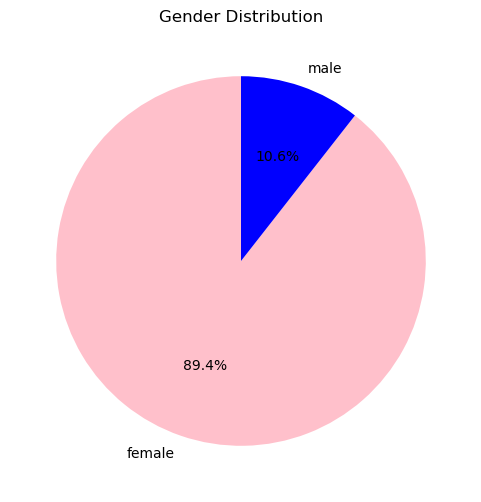

In [43]:
gender_counts = df['gender'].value_counts()

# Define colors for each gender
colors = ['blue' if gender == 'male' else 'pink' for gender in gender_counts.index]

# Visualization: Gender Distribution Pie Chart
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.ylabel('')  # Remove the y-label as it is not necessary for pie charts
plt.show()

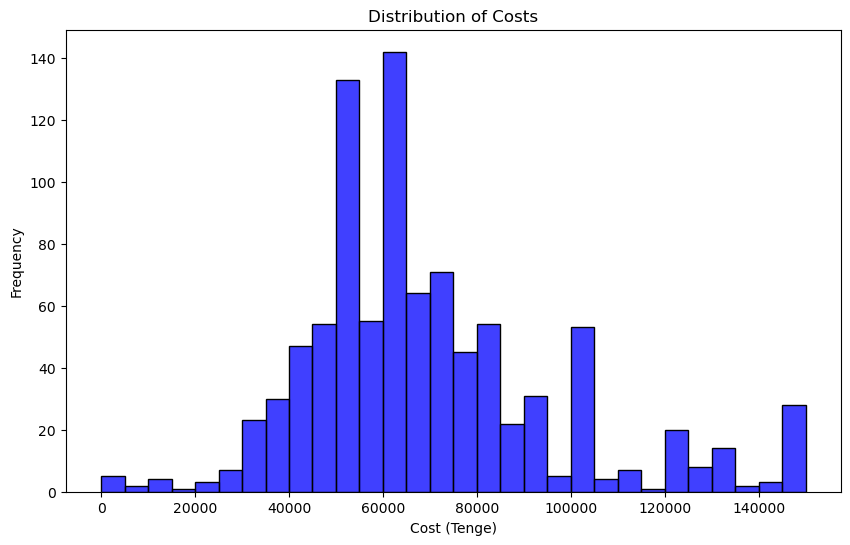

In [45]:
# Visualization 1: Histogram of Costs
# Filter the DataFrame to only include costs between 0 and 150000 tenge
df_filtered = df[(df['cost'] >= 0) & (df['cost'] <= 150000)]
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['cost'], bins=30, kde=False, color='blue')
plt.title('Distribution of Costs')
plt.xlabel('Cost (Tenge)')
plt.ylabel('Frequency')
plt.show()

In [47]:
print(df[df['cost'] == 0]['message'].iloc[0])

Здравствуйте ищу девочку на подселеник в красивую двухкомнатную квартиру в Алмасити БЕСПЛАТНО С вас уборка готовка и присмотр за школьником когда я на работе Я девушка 87770373873


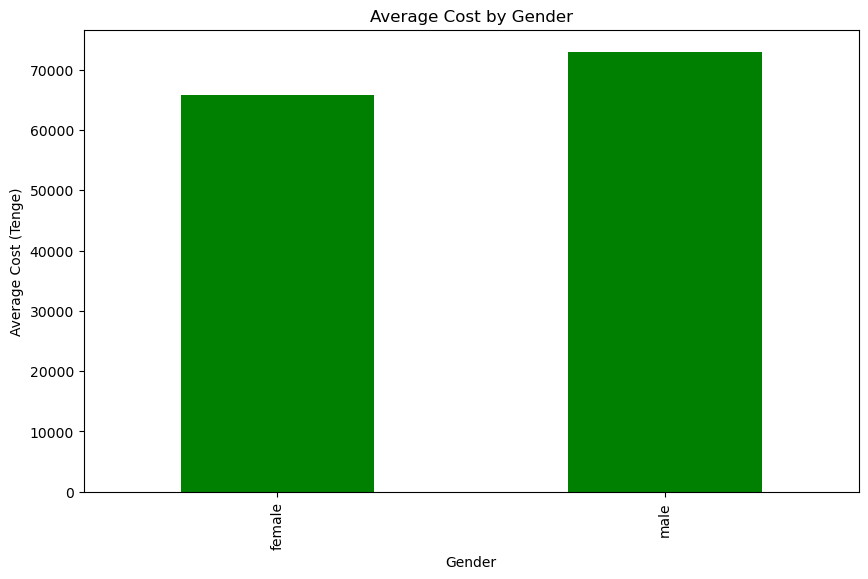

In [49]:
# Visualization 3: Average Cost by Gender
plt.figure(figsize=(10, 6))
average_cost_by_gender = df_filtered.groupby('gender')['cost'].mean()
average_cost_by_gender.plot(kind='bar', color='green')
plt.title('Average Cost by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Cost (Tenge)')
plt.show()

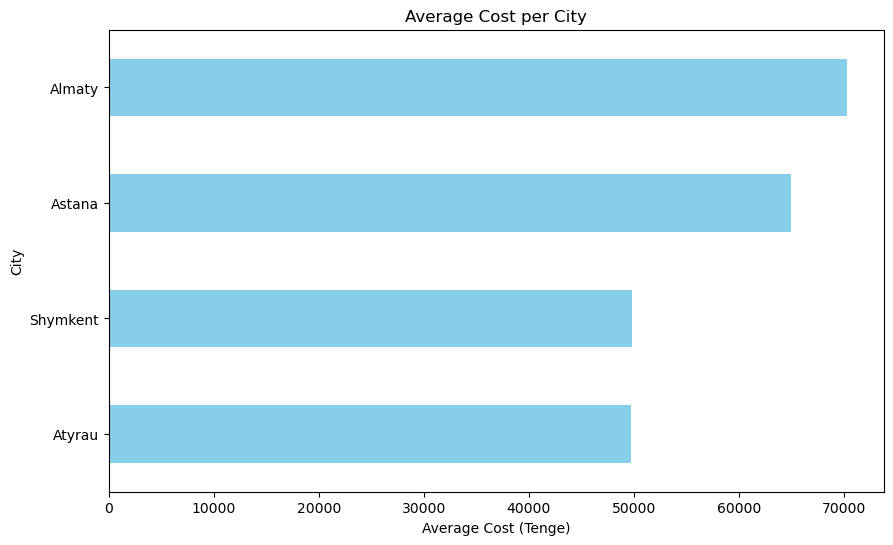

In [59]:
# Calculate the average cost per city
average_cost_per_city = df_filtered.groupby('city')['cost'].mean()

# Visualization: Average Cost per City
plt.figure(figsize=(10, 6))
average_cost_per_city.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Average Cost per City')
plt.xlabel('Average Cost (Tenge)')
plt.ylabel('City')
plt.show()